# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import warnings
import time
import matplotlib.cm as cm
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import geopandas

warnings.filterwarnings("ignore")
plt.rcParams["figure.autolayout"] = True


# 1 Input Data

In [2]:
# input dataframe from original csv file
crash = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
people = pd.read_csv("Traffic_Crashes_-_People.csv")

In [3]:
crash 

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671652,129bb6a5da2b3a2e3929a1f4b173eb56927d0b4443ca8d...,JF455068,NaN,10/29/2022 08:30:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,ANGLE,...,0.0,0.0,2.0,0.0,20,7,10,41.782143,-87.605820,POINT (-87.605820413489 41.78214288843)
671653,4f718d7b65c4a576fd7a23b431145315c31d97a97b5c67...,JF455794,NaN,10/30/2022 08:10:00 PM,30,OTHER,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,1.0,3.0,0.0,20,1,10,41.744091,-87.591812,POINT (-87.591812224025 41.744090710614)
671654,0b7bca652f2b567ff91deb082a88fe1f4bf8d0b0858c40...,JF456305,NaN,10/31/2022 09:00:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,FOG/SMOKE/HAZE,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,9,2,10,41.933758,-87.724525,POINT (-87.724525019818 41.933758029851)
671655,5e4ebb14ef8850252c176f2ad1edcc8cee975dda5a7d04...,JF456265,NaN,10/31/2022 08:50:00 AM,30,NO CONTROLS,NO CONTROLS,FOG/SMOKE/HAZE,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,8,2,10,41.876249,-87.665957,POINT (-87.665957272976 41.876249132918)


In [4]:
crash.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [5]:
people

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473478,P323810,PASSENGER,d735d81e463f3b6ce7c2c18ff0d26c55a29cd76ac913f4...,JF472210,1388136.0,11/04/2022 05:15:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473479,P324114,PASSENGER,5a4ffe03faf523428fc23a3a5646697c90a997bcec71b9...,JF474768,1389408.0,11/04/2022 07:00:00 PM,3.0,PLAINFIELD,IL,60586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473480,P324115,PASSENGER,5a4ffe03faf523428fc23a3a5646697c90a997bcec71b9...,JF474768,1389408.0,11/04/2022 07:00:00 PM,4.0,CHICAGO,IL,60625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473481,P324116,PASSENGER,5a4ffe03faf523428fc23a3a5646697c90a997bcec71b9...,JF474768,1389408.0,11/04/2022 07:00:00 PM,5.0,CHICAGO,IL,60706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

# 2 Data Cleaning

## 2.1 Remove Data with Low Availability

In [7]:
#define functioin for finding variables with low data availability
def proportion_missing(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

In [8]:
crash_property = proportion_missing(crash)
crash_property

,column_name,percent_missing
CRASH_RECORD_ID,CRASH_RECORD_ID,0.000000
CRASH_MONTH,CRASH_MONTH,0.000000
CRASH_DAY_OF_WEEK,CRASH_DAY_OF_WEEK,0.000000
CRASH_HOUR,CRASH_HOUR,0.000000
NUM_UNITS,NUM_UNITS,0.000000
SEC_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,0.000000
PRIM_CONTRIBUTORY_CAUSE,PRIM_CONTRIBUTORY_CAUSE,0.000000
DATE_POLICE_NOTIFIED,DATE_POLICE_NOTIFIED,0.000000
DAMAGE,DAMAGE,0.000000
CRASH_TYPE,CRASH_TYPE,0.000000


In [9]:
# remove data that the percentage of missing is over 5%
crash_property = crash_property[crash_property['percent_missing'] < 5]
crash_property

,column_name,percent_missing
CRASH_RECORD_ID,CRASH_RECORD_ID,0.000000
CRASH_MONTH,CRASH_MONTH,0.000000
CRASH_DAY_OF_WEEK,CRASH_DAY_OF_WEEK,0.000000
CRASH_HOUR,CRASH_HOUR,0.000000
NUM_UNITS,NUM_UNITS,0.000000
SEC_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,0.000000
PRIM_CONTRIBUTORY_CAUSE,PRIM_CONTRIBUTORY_CAUSE,0.000000
DATE_POLICE_NOTIFIED,DATE_POLICE_NOTIFIED,0.000000
DAMAGE,DAMAGE,0.000000
CRASH_TYPE,CRASH_TYPE,0.000000


In [10]:
crash = crash[crash_property.index]
crash

,CRASH_RECORD_ID,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,SEC_CONTRIBUTORY_CAUSE,PRIM_CONTRIBUTORY_CAUSE,DATE_POLICE_NOTIFIED,DAMAGE,CRASH_TYPE,...,INJURIES_NO_INDICATION,INJURIES_INCAPACITATING,INJURIES_FATAL,INJURIES_UNKNOWN,MOST_SEVERE_INJURY,LONGITUDE,LATITUDE,LOCATION,RD_NO,REPORT_TYPE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,3,2,14,2,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,IMPROPER TURNING/NO SIGNAL,03/25/2019 03:17:00 PM,"OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,...,2.0,0.0,0.0,0.0,"REPORTED, NOT EVIDENT",-87.641201,41.884547,POINT (-87.64120093714 41.884547224337),JC199149,ON SCENE
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,9,4,8,2,FAILING TO YIELD RIGHT-OF-WAY,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",09/05/2018 09:00:00 AM,"OVER $1,500",NO INJURY / DRIVE AWAY,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.740659,41.968562,POINT (-87.740659314632 41.968562453871),JB422857,NOT ON SCENE (DESK REPORT)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,7,6,0,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,07/15/2022 12:50:00 AM,"OVER $1,500",NO INJURY / DRIVE AWAY,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.716203,41.886336,POINT (-87.716203130599 41.886336409761),JF318029,ON SCENE
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,8,2,11,2,NOT APPLICABLE,DISREGARDING TRAFFIC SIGNALS,09/01/2022 11:30:00 AM,"$501 - $1,500",NO INJURY / DRIVE AWAY,...,3.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.721097,41.749348,POINT (-87.721096727406 41.749348170421),JF378711,NOT ON SCENE (DESK REPORT)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,7,6,18,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,07/20/2022 11:00:00 AM,"OVER $1,500",NO INJURY / DRIVE AWAY,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.667997,41.925111,POINT (-87.667997321599 41.925110815832),JF324552,NOT ON SCENE (DESK REPORT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671652,129bb6a5da2b3a2e3929a1f4b173eb56927d0b4443ca8d...,10,7,20,2,NOT APPLICABLE,UNABLE TO DETERMINE,10/30/2022 09:26:00 AM,"OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.605820,41.782143,POINT (-87.605820413489 41.78214288843),JF455068,ON SCENE
671653,4f718d7b65c4a576fd7a23b431145315c31d97a97b5c67...,10,1,20,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,10/30/2022 08:18:00 PM,"OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,...,3.0,0.0,0.0,0.0,"REPORTED, NOT EVIDENT",-87.591812,41.744091,POINT (-87.591812224025 41.744090710614),JF455794,ON SCENE
671654,0b7bca652f2b567ff91deb082a88fe1f4bf8d0b0858c40...,10,2,9,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,10/31/2022 09:30:00 AM,"OVER $1,500",NO INJURY / DRIVE AWAY,...,1.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.724525,41.933758,POINT (-87.724525019818 41.933758029851),JF456305,ON SCENE
671655,5e4ebb14ef8850252c176f2ad1edcc8cee975dda5a7d04...,10,2,8,2,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER OVERTAKING/PASSING,10/31/2022 09:45:00 AM,"$501 - $1,500",NO INJURY / DRIVE AWAY,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.665957,41.876249,POINT (-87.665957272976 41.876249132918),JF456265,NOT ON SCENE (DESK REPORT)


In [11]:
# remove data that the location is not in Chicago
crash = crash[crash['LONGITUDE'] < -85]

## 2.2 Combining Crash Data and People Data (Join method)

In [12]:
#select variables from people
people_demoinfo = people[['CRASH_RECORD_ID','AGE','SEX','PERSON_TYPE']]

#assign numeric values for SEX
people_demoinfo = people_demoinfo.replace({'M':0, 'X':1, 'F':2})

#removing rows of passengers
people_demoinfo  =people_demoinfo [people_demoinfo.PERSON_TYPE=='DRIVER']

#removing some data with defects,like people with negative age LOL
people_demoinfo = people_demoinfo.drop(people_demoinfo[people_demoinfo['AGE']<=0].index)
people_demoinfo

,CRASH_RECORD_ID,AGE,SEX,PERSON_TYPE
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,25.0,0.0,DRIVER
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,37.0,0.0,DRIVER
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,NaN,1.0,DRIVER
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,NaN,1.0,DRIVER
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,NaN,1.0,DRIVER
...,...,...,...,...
1473345,cdf17eec66c6748b9c9c0f7da6676a05a84479e8bf6427...,53.0,0.0,DRIVER
1473346,5a4ffe03faf523428fc23a3a5646697c90a997bcec71b9...,35.0,0.0,DRIVER
1473347,5a4ffe03faf523428fc23a3a5646697c90a997bcec71b9...,NaN,0.0,DRIVER
1473348,1e8dd187599cc2a52e4e334d7505120c46e373a433409c...,47.0,0.0,DRIVER


In [13]:
people_demoinfo.describe()

,AGE,SEX
count,830921.000000,1.138068e+06
mean,40.414362,8.088717e-01
std,15.413176,9.251979e-01
min,1.000000,0.000000e+00
25%,28.000000,0.000000e+00
50%,38.000000,0.000000e+00
75%,52.000000,2.000000e+00
max,110.000000,2.000000e+00


In [14]:
people_demoinfo_miss = proportion_missing(people_demoinfo)
people_demoinfo_miss 

,column_name,percent_missing
CRASH_RECORD_ID,CRASH_RECORD_ID,0.000000
PERSON_TYPE,PERSON_TYPE,0.000000
SEX,SEX,0.008522
AGE,AGE,26.994680


In [15]:
people_demoinfo= people_demoinfo.drop(columns=['PERSON_TYPE'])

# summarize drivers' age and sex in terms of car crash ID
average_demoinfo= people_demoinfo.groupby(by='CRASH_RECORD_ID').sum()/people_demoinfo.groupby(by='CRASH_RECORD_ID').count()
average_demoinfo

,AGE,SEX
CRASH_RECORD_ID,,
000013b0123279411e0ec856dae95ab9f0851764350b7feaeb982c7707c6722066910e9391e60f45cec4b7a7a6643eeedb5de39e7245b03447a44c793680dc4b,51.0,2.0
00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1343228a53acd61a83b0e2b003ace79defc01b0f829fc47b9462027509b5e0ec1eaf3a5f2248121f379,35.0,1.5
000043c6564ec4d54bc4efd957d97ca97f38a965dd64b46b4ea46338c63fa875f71181d3e7056d22be66221a51ec6eca0b050ed5be812e331733616faae49fea,NaN,1.0
000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f37f6c9b02e2a430d38ec739d2a5f45432979a01920c84f4700f6d4d63103a7878169bc1946367e8ee0a,47.5,0.0
0000b70a00c8809f76b5234f81753264d9160c314cc5e676cb229c2c15fa21188b243a53321fc6629b78da7bac5c20816c16fa0675a7284c0eed1d8751e1a371,NaN,0.0
...,...,...
ffffc0eaf9bc22a04bf318b62e0e1c5ec59a4f3c0c34936aebaf00612551ed488fd16a0367f8e15a77268560f0c6d0f4db6e441270063f35afacf0dfe70d7c09,NaN,2.0
ffffc784918a94c6d5ec9cdced500004faafc6a9e6e01b4ee4c6e5dd9f9f1a29faa55f329086abe588ecbd3ec14e13914f936aaadf417971bd9c924f5d2bdf03,NaN,0.0
ffffc802346fd6f48f99117898fbc558237a3052c327b875d4dabc837f7e59680b6fafaddf58d95ac0a0e8406f4b7f2024f0cc8517739756ac043a756ccb0b11,49.0,1.0


In [16]:
#drop rows with N/A AGE variables
average_demoinfo.dropna(subset=['AGE'],inplace=True)

In [17]:
average_demoinfo.describe()

,AGE,SEX
count,532197.000000,532197.000000
mean,40.574065,0.789103
std,13.370749,0.746537
min,1.000000,0.000000
25%,30.000000,0.000000
50%,39.000000,1.000000
75%,49.000000,1.000000
max,110.000000,2.000000


In [18]:
average_demoinfo

,AGE,SEX
CRASH_RECORD_ID,,
000013b0123279411e0ec856dae95ab9f0851764350b7feaeb982c7707c6722066910e9391e60f45cec4b7a7a6643eeedb5de39e7245b03447a44c793680dc4b,51.0,2.0
00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1343228a53acd61a83b0e2b003ace79defc01b0f829fc47b9462027509b5e0ec1eaf3a5f2248121f379,35.0,1.5
000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f37f6c9b02e2a430d38ec739d2a5f45432979a01920c84f4700f6d4d63103a7878169bc1946367e8ee0a,47.5,0.0
0000c280b9c15e9ec96aa2eed34bf0f3ef1d604c6ea4609ee73f9186b12c3f219fad4863a1ee4a81145460bf72d3c4d3480f22bb6b795f86a5d00fe03b86f4f3,65.0,2.0
0001301de281cb6fc82102d9f9decef9c0a40f5481c903336a6d3a07e2ee7c0d38c20a1f602c57d4b33cb03585fc2c0646125694567529c18d97cdf1e28b5488,43.5,1.0
...,...,...
ffffa944b3d7267d25748e1cd44250bea2da4a5aa2e0a92b83124951dcdb5db843985dbbb3b7e7986db382ae360cef8b4ac04cde76925aeb6a16bfc3e7283ccb,44.5,0.0
ffffb99bbc13fa1949cca5569e2ca38e3b314e4f444e0dab6eba5d33448b43b675b0bb3c2e55faea8326a9c9c136f6e78e36b383a05dce0caa07a4b2c19cbe0d,60.0,0.0
ffffc802346fd6f48f99117898fbc558237a3052c327b875d4dabc837f7e59680b6fafaddf58d95ac0a0e8406f4b7f2024f0cc8517739756ac043a756ccb0b11,49.0,1.0


In [19]:
average_demoinfo_p=proportion_missing(average_demoinfo)
average_demoinfo_p

,column_name,percent_missing
AGE,AGE,0.0
SEX,SEX,0.0


In [20]:
#JOIN crash dataset and people_demoinfo
crash_result= pd.merge(average_demoinfo,crash,how='inner', right_on='CRASH_RECORD_ID',
      left_index=True)

#fill N/A values with 0
crash_result.fillna(0,inplace = True)
crash_result

,AGE,SEX,CRASH_RECORD_ID,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,SEC_CONTRIBUTORY_CAUSE,PRIM_CONTRIBUTORY_CAUSE,DATE_POLICE_NOTIFIED,...,INJURIES_NO_INDICATION,INJURIES_INCAPACITATING,INJURIES_FATAL,INJURIES_UNKNOWN,MOST_SEVERE_INJURY,LONGITUDE,LATITUDE,LOCATION,RD_NO,REPORT_TYPE
79630,51.0,2.0,000013b0123279411e0ec856dae95ab9f0851764350b7f...,11,2,13,2,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,11/16/2020 03:53:00 PM,...,1.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.695360,41.844584,POINT (-87.695359843215 41.844584300311),JD433095,NOT ON SCENE (DESK REPORT)
81415,35.0,1.5,00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1...,4,7,5,2,UNABLE TO DETERMINE,IMPROPER LANE USAGE,04/16/2016 06:30:00 AM,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.695363,41.844734,POINT (-87.695363066709 41.844733938666),HZ228060,NOT ON SCENE (DESK REPORT)
84847,47.5,0.0,000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f3...,10,2,2,2,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,FAILING TO YIELD RIGHT-OF-WAY,10/24/2016 02:43:00 AM,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.695937,41.873272,POINT (-87.69593723519 41.873272095065),HZ486518,ON SCENE
79860,65.0,2.0,0000c280b9c15e9ec96aa2eed34bf0f3ef1d604c6ea460...,1,3,11,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,01/02/2018 12:12:00 PM,...,1.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.697472,41.924697,POINT (-87.697471842296 41.924696904233),JB101554,NOT ON SCENE (DESK REPORT)
81530,43.5,1.0,0001301de281cb6fc82102d9f9decef9c0a40f5481c903...,6,4,8,2,FAILING TO YIELD RIGHT-OF-WAY,DISREGARDING TRAFFIC SIGNALS,06/03/2020 08:20:00 AM,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.703101,41.990532,POINT (-87.70310134421 41.990532442326),JD252047,NOT ON SCENE (DESK REPORT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,44.5,0.0,ffffa944b3d7267d25748e1cd44250bea2da4a5aa2e0a9...,2,5,13,2,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,02/13/2018 04:15:00 PM,...,3.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.787970,41.997267,POINT (-87.787970330253 41.997266869473),JB150789,NOT ON SCENE (DESK REPORT)
641704,60.0,0.0,ffffb99bbc13fa1949cca5569e2ca38e3b314e4f444e0d...,7,6,18,1,UNABLE TO DETERMINE,UNABLE TO DETERMINE,07/06/2019 10:38:00 AM,...,1.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.687248,41.975810,POINT (-87.687248100509 41.975809664176),JC337098,NOT ON SCENE (DESK REPORT)
644862,49.0,1.0,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,7,3,7,2,PHYSICAL CONDITION OF DRIVER,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,07/28/2020 07:38:00 AM,...,2.0,0.0,0.0,0.0,"REPORTED, NOT EVIDENT",-87.711661,41.897944,POINT (-87.711661384741 41.897943912705),JD312526,ON SCENE
640395,33.5,2.0,ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c...,7,5,15,2,NOT APPLICABLE,UNABLE TO DETERMINE,07/19/2018 04:30:00 PM,...,2.0,0.0,0.0,0.0,NO INDICATION OF INJURY,-87.639639,41.940241,POINT (-87.639639114276 41.940241193256),JB356563,NOT ON SCENE (DESK REPORT)


## 2.3 Crash Data Filtering & Reclassification

In [21]:
# removing variables that not related to car crash causes 

crash_result = crash_result.drop(columns=['CRASH_RECORD_ID','DATE_POLICE_NOTIFIED', 'LOCATION','RD_NO', 'STREET_NO', 'CRASH_DATE', 'STREET_NAME','SEC_CONTRIBUTORY_CAUSE', 'PRIM_CONTRIBUTORY_CAUSE','DAMAGE',
       'CRASH_TYPE','BEAT_OF_OCCURRENCE', 'INJURIES_TOTAL','INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_INCAPACITATING', 'INJURIES_FATAL',
       'INJURIES_UNKNOWN', 'MOST_SEVERE_INJURY', 'REPORT_TYPE'])
crash_result

,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,ROAD_DEFECT,ROADWAY_SURFACE_COND,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,51.0,2.0,11,2,13,2,UNKNOWN,DRY,PARKING LOT,PARKED MOTOR VEHICLE,35,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,S,-87.695360,41.844584
81415,35.0,1.5,4,7,5,2,NO DEFECTS,DRY,OTHER,SIDESWIPE SAME DIRECTION,30,DAWN,CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,STRAIGHT AND LEVEL,S,-87.695363,41.844734
84847,47.5,0.0,10,2,2,2,NO DEFECTS,DRY,DIVIDED - W/MEDIAN (NOT RAISED),SIDESWIPE SAME DIRECTION,35,"DARKNESS, LIGHTED ROAD",CLEAR,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,S,-87.695937,41.873272
79860,65.0,2.0,1,3,11,2,NO DEFECTS,DRY,OTHER,PARKED MOTOR VEHICLE,5,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,W,-87.697472,41.924697
81530,43.5,1.0,6,4,8,2,NO DEFECTS,WET,FOUR WAY,TURNING,30,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,STRAIGHT AND LEVEL,W,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,44.5,0.0,2,5,13,2,NO DEFECTS,DRY,ONE-WAY,REAR END,30,DAYLIGHT,CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,STRAIGHT AND LEVEL,N,-87.787970,41.997267
641704,60.0,0.0,7,6,18,1,NO DEFECTS,DRY,NOT DIVIDED,OTHER OBJECT,30,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,W,-87.687248,41.975810
644862,49.0,1.0,7,3,7,2,NO DEFECTS,DRY,NOT DIVIDED,HEAD ON,30,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,N,-87.711661,41.897944
640395,33.5,2.0,7,5,15,2,UNKNOWN,UNKNOWN,NOT DIVIDED,SIDESWIPE SAME DIRECTION,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,STRAIGHT AND LEVEL,W,-87.639639,41.940241


In [22]:
# reclassification, classify complex variables into less categories
crash_result = crash_result.replace({'NO DEFECTS':1, 'UNKNOWN':0, 'OTHER':0, 'SHOULDER DEFECT':2, 'RUT, HOLES':2,
       'WORN SURFACE':2, 'DEBRIS ON ROADWAY':2})

In [23]:
crash_result = crash_result.replace({'DRY':1,  'SNOW OR SLUSH':3, 'WET':3, 'ICE':3, 'SAND, MUD, DIRT':2})

In [24]:
crash_result = crash_result.replace({'DAYLIGHT':1, 'DARKNESS, LIGHTED ROAD':2, 'DARKNESS':2, 'DAWN':2,
       'DUSK':2})

In [25]:
crash_result = crash_result.replace({'CLEAR':1, 'CLOUDY/OVERCAST':1,  'SNOW':2, 'RAIN':2,
       'FREEZING RAIN/DRIZZLE':2, 'FOG/SMOKE/HAZE':2, 'SLEET/HAIL':2,
       'BLOWING SNOW':2, 'SEVERE CROSS WIND GATE':0,
       'BLOWING SAND, SOIL, DIRT':2})

In [26]:
crash_result = crash_result.replace({'FUNCTIONING PROPERLY':1, 'NO CONTROLS':2, 'NOT FUNCTIONING':2,
       'FUNCTIONING IMPROPERLY':2, 'WORN REFLECTIVE MATERIAL':2, 'MISSING':2})

In [27]:
crash_result = crash_result.replace({'STRAIGHT AND LEVEL':0, 'STRAIGHT ON GRADE':0, 'CURVE ON GRADE':1,
       'CURVE, LEVEL':1, 'STRAIGHT ON HILLCREST':0, 'CURVE ON HILLCREST':1})

In [28]:
crash_result = crash_result.replace({'W':1, 'N':1, 'S':1, 'E':1})

In [29]:
# retain some data that need to be used, because other variables will be assigned numeric values by functions in 2.4 
crash_retain = crash_result[['AGE','SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS','POSTED_SPEED_LIMIT','ROAD_DEFECT','ROADWAY_SURFACE_COND','LIGHTING_CONDITION','WEATHER_CONDITION','DEVICE_CONDITION','ALIGNMENT','STREET_DIRECTION', 'LONGITUDE','LATITUDE']]
crash_retain

,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,51.0,2.0,11,2,13,2,35,0,1,1,1,2,0,1,-87.695360,41.844584
81415,35.0,1.5,4,7,5,2,30,1,1,2,1,1,0,1,-87.695363,41.844734
84847,47.5,0.0,10,2,2,2,35,1,1,2,1,2,0,1,-87.695937,41.873272
79860,65.0,2.0,1,3,11,2,5,1,1,1,1,2,0,1,-87.697472,41.924697
81530,43.5,1.0,6,4,8,2,30,1,3,1,2,1,0,1,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,44.5,0.0,2,5,13,2,30,1,1,1,1,1,0,1,-87.787970,41.997267
641704,60.0,0.0,7,6,18,1,30,1,1,1,1,2,0,1,-87.687248,41.975810
644862,49.0,1.0,7,3,7,2,30,1,1,1,1,2,0,1,-87.711661,41.897944
640395,33.5,2.0,7,5,15,2,30,0,0,0,0,0,0,1,-87.639639,41.940241


In [30]:
crash_result = crash_result.drop(columns=['AGE','SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS','POSTED_SPEED_LIMIT','ROAD_DEFECT','ROADWAY_SURFACE_COND','LIGHTING_CONDITION','WEATHER_CONDITION','DEVICE_CONDITION','ALIGNMENT','STREET_DIRECTION','LONGITUDE','LATITUDE'])
crash_result

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE
79630,PARKING LOT,PARKED MOTOR VEHICLE,2
81415,0,SIDESWIPE SAME DIRECTION,TRAFFIC SIGNAL
84847,DIVIDED - W/MEDIAN (NOT RAISED),SIDESWIPE SAME DIRECTION,2
79860,0,PARKED MOTOR VEHICLE,2
81530,FOUR WAY,TURNING,TRAFFIC SIGNAL
...,...,...,...
645308,ONE-WAY,REAR END,TRAFFIC SIGNAL
641704,NOT DIVIDED,OTHER OBJECT,2
644862,NOT DIVIDED,HEAD ON,2
640395,NOT DIVIDED,SIDESWIPE SAME DIRECTION,0


## 2.4 Crash Data Value Reassignment (3 variables)

In [31]:
#showing the relationship between nominal values and the numeric values assigned 
def pca_matrix_property(data):
    for i in data.columns:
        print('For' + str(i) +':')
        indexs = data[i].unique()
        number = 0
        for j in indexs:
            print( str(j) + " change to " + str(number))
            number+=1
        print("\n")   


In [32]:
pca_matrix_property(crash_result)

ForTRAFFICWAY_TYPE:
PARKING LOT change to 0
0 change to 1
DIVIDED - W/MEDIAN (NOT RAISED) change to 2
FOUR WAY change to 3
ONE-WAY change to 4
NOT DIVIDED change to 5
DIVIDED - W/MEDIAN BARRIER change to 6
ALLEY change to 7
CENTER TURN LANE change to 8
NOT REPORTED change to 9
RAMP change to 10
UNKNOWN INTERSECTION TYPE change to 11
DRIVEWAY change to 12
T-INTERSECTION change to 13
FIVE POINT, OR MORE change to 14
Y-INTERSECTION change to 15
ROUNDABOUT change to 16
TRAFFIC ROUTE change to 17
L-INTERSECTION change to 18


ForFIRST_CRASH_TYPE:
PARKED MOTOR VEHICLE change to 0
SIDESWIPE SAME DIRECTION change to 1
TURNING change to 2
REAR END change to 3
ANGLE change to 4
REAR TO FRONT change to 5
PEDESTRIAN change to 6
FIXED OBJECT change to 7
REAR TO SIDE change to 8
HEAD ON change to 9
REAR TO REAR change to 10
PEDALCYCLIST change to 11
SIDESWIPE OPPOSITE DIRECTION change to 12
OTHER OBJECT change to 13
OTHER NONCOLLISION change to 14
ANIMAL change to 15
OVERTURNED change to 16
TRAIN ch

In [33]:
# define value assignment function

def pca_matrix(data):
    for i in data.columns:
        indexs = data[i].unique()
        number = 0
        for j in indexs:
            data[i] = data[i].replace({j : number})
            number+=1

In [34]:
pca_matrix(crash_result)
crash_result

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE
79630,1,0,4
81415,1,1,1
84847,2,1,4
79860,1,0,4
81530,3,2,1
...,...,...,...
645308,4,3,1
641704,5,13,4
644862,5,9,4
640395,5,1,4


In [35]:
# add variables retained back
crash_result[['AGE','SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS','POSTED_SPEED_LIMIT','ROAD_DEFECT','ROADWAY_SURFACE_COND','LIGHTING_CONDITION','WEATHER_CONDITION','DEVICE_CONDITION','ALIGNMENT','STREET_DIRECTION','LONGITUDE','LATITUDE' ]] = crash_retain[['AGE','SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS','POSTED_SPEED_LIMIT','ROAD_DEFECT','ROADWAY_SURFACE_COND','LIGHTING_CONDITION','WEATHER_CONDITION','DEVICE_CONDITION','ALIGNMENT','STREET_DIRECTION','LONGITUDE','LATITUDE']]

In [36]:
crash_result['LONGITUDE'].dropna()
crash_result['LATITUDE'].dropna()
crash_result

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,1,0,4,51.0,2.0,11,2,13,2,35,0,1,1,1,2,0,1,-87.695360,41.844584
81415,1,1,1,35.0,1.5,4,7,5,2,30,1,1,2,1,1,0,1,-87.695363,41.844734
84847,2,1,4,47.5,0.0,10,2,2,2,35,1,1,2,1,2,0,1,-87.695937,41.873272
79860,1,0,4,65.0,2.0,1,3,11,2,5,1,1,1,1,2,0,1,-87.697472,41.924697
81530,3,2,1,43.5,1.0,6,4,8,2,30,1,3,1,2,1,0,1,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,4,3,1,44.5,0.0,2,5,13,2,30,1,1,1,1,1,0,1,-87.787970,41.997267
641704,5,13,4,60.0,0.0,7,6,18,1,30,1,1,1,1,2,0,1,-87.687248,41.975810
644862,5,9,4,49.0,1.0,7,3,7,2,30,1,1,1,1,2,0,1,-87.711661,41.897944
640395,5,1,4,33.5,2.0,7,5,15,2,30,0,0,0,0,0,0,1,-87.639639,41.940241


In [37]:
crash_result.fillna(0, inplace=True)
crash_result

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,1,0,4,51.0,2.0,11,2,13,2,35,0,1,1,1,2,0,1,-87.695360,41.844584
81415,1,1,1,35.0,1.5,4,7,5,2,30,1,1,2,1,1,0,1,-87.695363,41.844734
84847,2,1,4,47.5,0.0,10,2,2,2,35,1,1,2,1,2,0,1,-87.695937,41.873272
79860,1,0,4,65.0,2.0,1,3,11,2,5,1,1,1,1,2,0,1,-87.697472,41.924697
81530,3,2,1,43.5,1.0,6,4,8,2,30,1,3,1,2,1,0,1,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,4,3,1,44.5,0.0,2,5,13,2,30,1,1,1,1,1,0,1,-87.787970,41.997267
641704,5,13,4,60.0,0.0,7,6,18,1,30,1,1,1,1,2,0,1,-87.687248,41.975810
644862,5,9,4,49.0,1.0,7,3,7,2,30,1,1,1,1,2,0,1,-87.711661,41.897944
640395,5,1,4,33.5,2.0,7,5,15,2,30,0,0,0,0,0,0,1,-87.639639,41.940241


In [38]:
crash_result_p=proportion_missing(crash_result)
crash_result_p

,column_name,percent_missing
TRAFFICWAY_TYPE,TRAFFICWAY_TYPE,0.0
STREET_DIRECTION,STREET_DIRECTION,0.0
ALIGNMENT,ALIGNMENT,0.0
DEVICE_CONDITION,DEVICE_CONDITION,0.0
WEATHER_CONDITION,WEATHER_CONDITION,0.0
LIGHTING_CONDITION,LIGHTING_CONDITION,0.0
ROADWAY_SURFACE_COND,ROADWAY_SURFACE_COND,0.0
ROAD_DEFECT,ROAD_DEFECT,0.0
LONGITUDE,LONGITUDE,0.0
POSTED_SPEED_LIMIT,POSTED_SPEED_LIMIT,0.0


In [39]:
#change all numeric values into integer
# crash_result = crash_result.astype('int')

Now, we get the cleaned matrix: crash

In [40]:
#back up 
crash_pca = crash_result.copy()

In [41]:
#export processed dataset for further analysis
# crash_result.to_csv('C:/Users/86150/Desktop/crash_result.csv',index=False)

OSError: Cannot save file into a non-existent directory: 'C:/Users/86150/Desktop'

In [42]:
crash_result

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,1,0,4,51.0,2.0,11,2,13,2,35,0,1,1,1,2,0,1,-87.695360,41.844584
81415,1,1,1,35.0,1.5,4,7,5,2,30,1,1,2,1,1,0,1,-87.695363,41.844734
84847,2,1,4,47.5,0.0,10,2,2,2,35,1,1,2,1,2,0,1,-87.695937,41.873272
79860,1,0,4,65.0,2.0,1,3,11,2,5,1,1,1,1,2,0,1,-87.697472,41.924697
81530,3,2,1,43.5,1.0,6,4,8,2,30,1,3,1,2,1,0,1,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,4,3,1,44.5,0.0,2,5,13,2,30,1,1,1,1,1,0,1,-87.787970,41.997267
641704,5,13,4,60.0,0.0,7,6,18,1,30,1,1,1,1,2,0,1,-87.687248,41.975810
644862,5,9,4,49.0,1.0,7,3,7,2,30,1,1,1,1,2,0,1,-87.711661,41.897944
640395,5,1,4,33.5,2.0,7,5,15,2,30,0,0,0,0,0,0,1,-87.639639,41.940241


# 3 Spatical Clustering

## 3.1 showing location on map

In [44]:
data_visual = crash_pca[['LONGITUDE','LATITUDE']]
data_visual = data_visual.rename({'LONGITUDE': 'longitude', 'LATITUDE': 'latitude'}, axis=1)
data_visual = data_visual.dropna()

In [45]:
# find the location boundary of data
BBox = ((data_visual.longitude.min(), data_visual.longitude.max(),      
         data_visual.latitude.min(), data_visual.latitude.max()))
BBox

(-87.936192947, -87.524587387, 41.644670132, 42.022779861)

In [46]:
#import Chicago map
ruh_m = plt.imread('map.png')

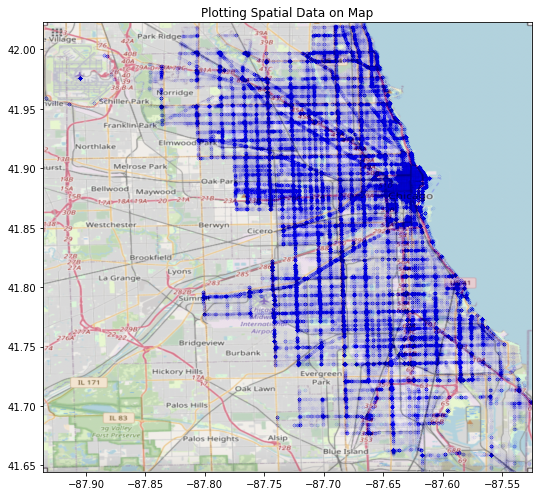

In [48]:
#show location on the map
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_visual.longitude,data_visual.latitude, zorder=1, alpha= 0.003, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## 3.2 showing factors on maps

In [49]:
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import geopandas as gpd
import numpy
import matplotlib.pyplot as plt

In [51]:
data_v = crash_pca.copy()
data_v

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,AGE,SEX,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION,LONGITUDE,LATITUDE
79630,1,0,4,51.0,2.0,11,2,13,2,35,0,1,1,1,2,0,1,-87.695360,41.844584
81415,1,1,1,35.0,1.5,4,7,5,2,30,1,1,2,1,1,0,1,-87.695363,41.844734
84847,2,1,4,47.5,0.0,10,2,2,2,35,1,1,2,1,2,0,1,-87.695937,41.873272
79860,1,0,4,65.0,2.0,1,3,11,2,5,1,1,1,1,2,0,1,-87.697472,41.924697
81530,3,2,1,43.5,1.0,6,4,8,2,30,1,3,1,2,1,0,1,-87.703101,41.990532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645308,4,3,1,44.5,0.0,2,5,13,2,30,1,1,1,1,1,0,1,-87.787970,41.997267
641704,5,13,4,60.0,0.0,7,6,18,1,30,1,1,1,1,2,0,1,-87.687248,41.975810
644862,5,9,4,49.0,1.0,7,3,7,2,30,1,1,1,1,2,0,1,-87.711661,41.897944
640395,5,1,4,33.5,2.0,7,5,15,2,30,0,0,0,0,0,0,1,-87.639639,41.940241


In [52]:
# change dataframe to GeoDataFrame
data_v = gpd.GeoDataFrame(data_v,geometry=gpd.points_from_xy(data_v.LONGITUDE, data_v.LATITUDE))

In [53]:
data_v.columns

Index(['TRAFFICWAY_TYPE', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE', 'AGE',
       'SEX', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS',
       'POSTED_SPEED_LIMIT', 'ROAD_DEFECT', 'ROADWAY_SURFACE_COND',
       'LIGHTING_CONDITION', 'WEATHER_CONDITION', 'DEVICE_CONDITION',
       'ALIGNMENT', 'STREET_DIRECTION', 'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

In [54]:
cluster_variables = [
    'TRAFFICWAY_TYPE', 
    'FIRST_CRASH_TYPE', 
    'TRAFFIC_CONTROL_DEVICE', 
    'AGE',
    'SEX',
    'CRASH_MONTH', 
    'CRASH_DAY_OF_WEEK',
    'CRASH_HOUR',
    'NUM_UNITS',
    'POSTED_SPEED_LIMIT', 
    'ROAD_DEFECT',
    'ROADWAY_SURFACE_COND',
    'LIGHTING_CONDITION', 
    'WEATHER_CONDITION',
    'DEVICE_CONDITION',
    'ALIGNMENT', 
    'STREET_DIRECTION',
]

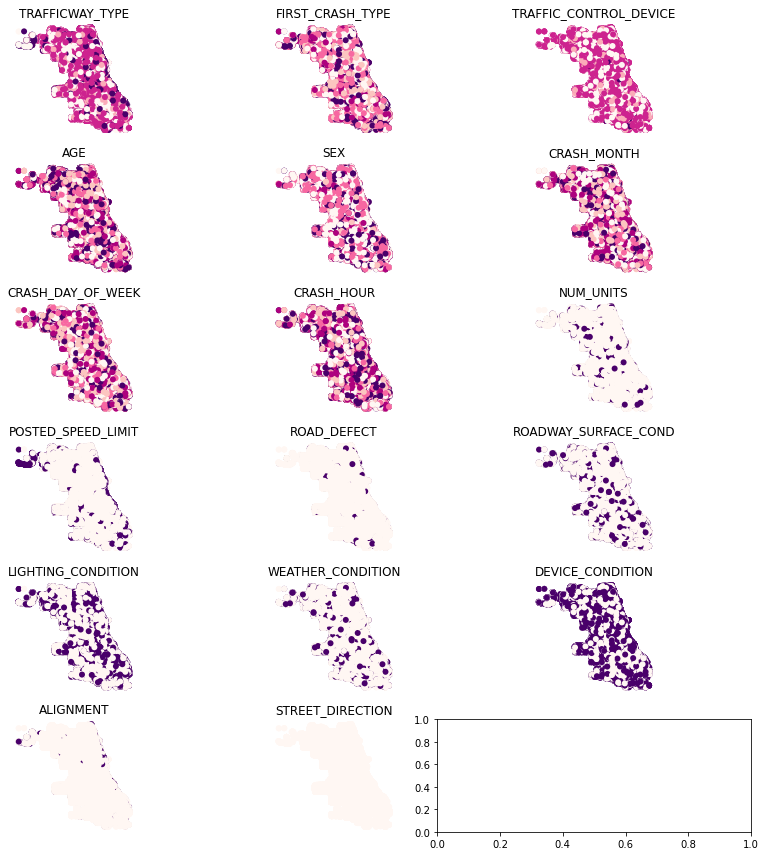

In [55]:
f, axs = plt.subplots(nrows=6, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    data_v.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()